In [197]:
import main as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
plt.rc('axes', labelsize=18, titlesize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [198]:
c1 = 0.16854213553945696
c2 = 0.7202787932977519
c3 = 0.48280147466755885

cant_xi = 111
x1 = np.random.normal(0,20,cant_xi)
x2 = np.random.uniform(0,100,cant_xi)
x3 = np.random.normal(50,150,cant_xi)
epsilon = np.random.normal(0,  1, cant_xi)

y = c1*x1 + c2*x2 - c3*x3 + epsilon

df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3
df['y'] = y
#df.to_csv('datasintetica.csv')

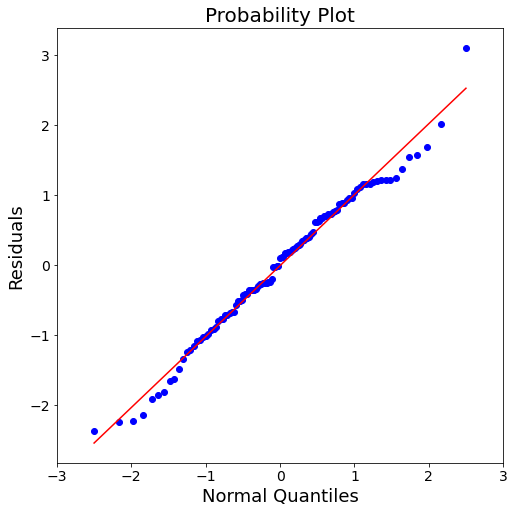

In [199]:
datasint = pd.read_csv("datasintetica.csv")

y_sint = datasint["y"].to_numpy()
X_sint = datasint[["x1","x2","x3"]].to_numpy()

grado = 2
q = 80

y_sint_res = m.fit(X_sint, y_sint, q, grado)

datasint["residuo"] = y_sint - y_sint_res

plt.rcParams["figure.figsize"] = (8, 8)

import scipy.stats as stats
stats.probplot(datasint["residuo"], dist="norm", plot=plt)
plt.xlim(-3, 3)
plt.ylabel("Residuals")
plt.xlabel("Normal Quantiles")
plt.show()

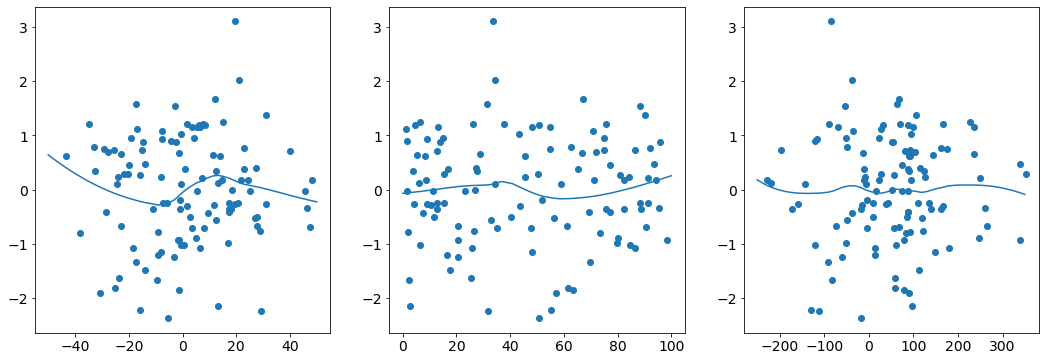

In [200]:
plt.rcParams["figure.figsize"] = (18, 6)
grado=2
q=80
fig, ax = plt.subplots(1, 3)
ax[0].scatter(datasint["x1"], datasint["residuo"])
x_lin = np.linspace(-50,50,50)
x_fit = [m.predict(datasint["x1"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q, grado) for i in x_lin]
ax[0].plot(x_lin, x_fit)
ax[1].scatter(datasint["x2"], datasint["residuo"])
x_lin = np.linspace(0,100,50)
x_fit = [m.predict(datasint["x2"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q, grado) for i in x_lin]
ax[1].plot(x_lin, x_fit)
ax[2].scatter(datasint["x3"], datasint["residuo"])
x_lin = np.linspace(-250,350,50)
x_fit = [m.predict(datasint["x3"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q, grado) for i in x_lin]
ax[2].plot(x_lin, x_fit)

plt.show()

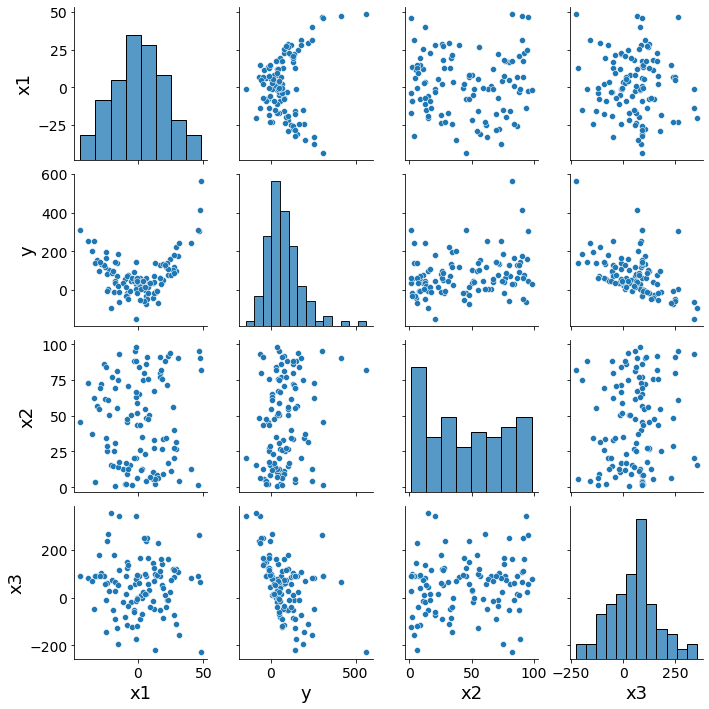

In [201]:
sns.pairplot(datasint[["x1","y","x2","x3"]])
plt.show()

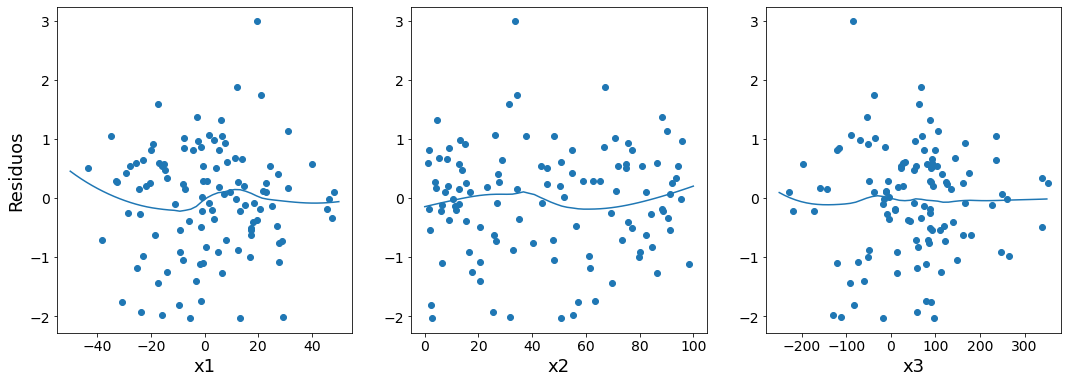

In [202]:
datasint = pd.read_csv("datasintetica.csv")

y_sint = datasint["y"].to_numpy()
X_sint = datasint[["x1","x2","x3"]].to_numpy()

grado = 2
q = 44
q2 = 80
y_sint_res = m.fit(X_sint, y_sint, q, grado)

datasint["residuo"] = y_sint - y_sint_res

plt.rcParams["figure.figsize"] = (18,6)
fig, ax = plt.subplots(1, 3)
ax[0].scatter(datasint["x1"], datasint["residuo"])
x_lin = np.linspace(-50,50,50)
x_fit = [m.predict(datasint["x1"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[0].plot(x_lin, x_fit)
ax[1].scatter(datasint["x2"], datasint["residuo"])
x_lin = np.linspace(0,100,50)
x_fit = [m.predict(datasint["x2"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[1].plot(x_lin, x_fit)
ax[2].scatter(datasint["x3"], datasint["residuo"])
x_lin = np.linspace(-250,350,50)
x_fit = [m.predict(datasint["x3"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[2].plot(x_lin, x_fit)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('Residuos')
ax[1].set_xlabel('x2')
ax[2].set_xlabel('x3')
plt.savefig('res_vs_xs.svg')
plt.show()

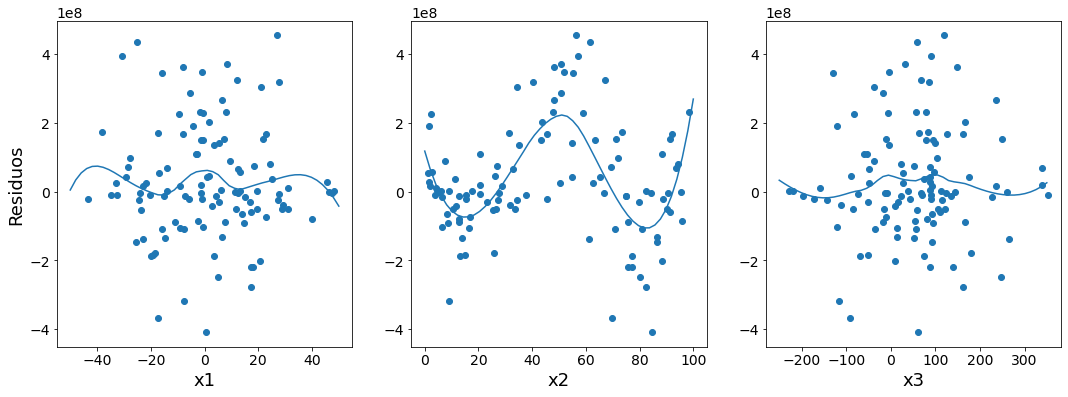

In [203]:
datasint = pd.read_csv("datasintetica.csv")

y_sint = datasint["y"].to_numpy()
X_sint = datasint[["x1","x2","x3"]].to_numpy()
y_sint = np.sin(X_sint.T[0]) + 5 * (X_sint.T[1]**5) - np.sin(X_sint.T[2]) + np.random.normal(0,1,len(X_sint))
datasint["y"] = y_sint
grado = 3
q = 44
y_sint_res = m.fit(X_sint, y_sint, q, grado)

datasint["residuo"] = y_sint - y_sint_res
plt.rcParams["figure.figsize"] = (8, 8)

plt.rcParams["figure.figsize"] = (18,6)
fig, ax = plt.subplots(1, 3)
ax[0].scatter(datasint["x1"], datasint["residuo"])
x_lin = np.linspace(-50,50,50)
x_fit = [m.predict(datasint["x1"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[0].plot(x_lin, x_fit)
ax[1].scatter(datasint["x2"], datasint["residuo"])
x_lin = np.linspace(0,100,50)
x_fit = [m.predict(datasint["x2"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[1].plot(x_lin, x_fit)
ax[2].scatter(datasint["x3"], datasint["residuo"])
x_lin = np.linspace(-250,350,50)
x_fit = [m.predict(datasint["x3"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[2].plot(x_lin, x_fit)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('Residuos')
ax[1].set_xlabel('x2')
ax[2].set_xlabel('x3')
plt.savefig('no_cuadratic3.svg')
plt.show()

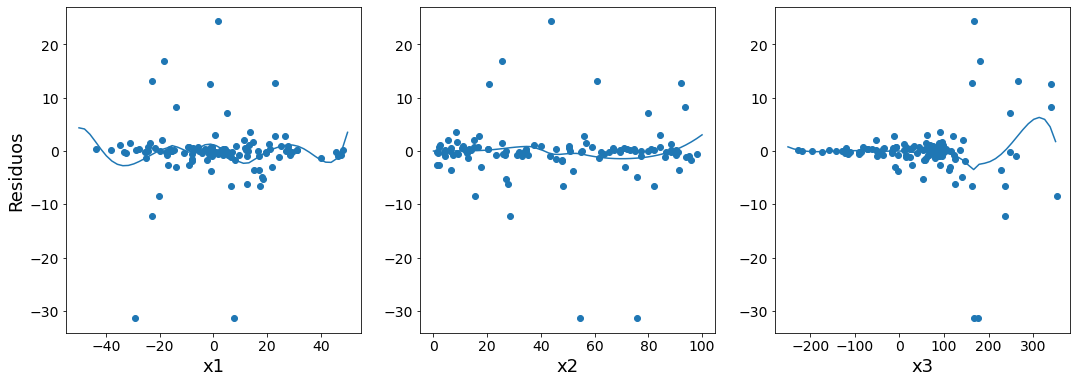

In [204]:
datasint = pd.read_csv("datasintetica.csv")

y_sint = datasint["y"].to_numpy()
X_sint = datasint[["x1","x2","x3"]].to_numpy()
y_sint = np.sin(X_sint.T[0]) + 5 * (X_sint.T[1]**5) - np.sin(X_sint.T[2]) + np.random.normal(0,1,len(X_sint))
#y_sint = np.sqrt(np.abs(np.sin(X_sint.T[0]))) + 5 * X_sint.T[1]**5 - np.cos(np.sqrt(np.abs(X_sint.T[2]))) + np.random.normal(0,1,len(X_sint))

datasint["y"] = y_sint
grado = 5
q = 100

y_sint_res = m.fit(X_sint, y_sint, q, grado)

datasint["residuo"] = y_sint - y_sint_res

plt.rcParams["figure.figsize"] = (18,6)
fig, ax = plt.subplots(1, 3)
ax[0].scatter(datasint["x1"], datasint["residuo"])
x_lin = np.linspace(-50,50,50)
x_fit = [m.predict(datasint["x1"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[0].plot(x_lin, x_fit)
ax[1].scatter(datasint["x2"], datasint["residuo"])
x_lin = np.linspace(0,100,50)
x_fit = [m.predict(datasint["x2"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[1].plot(x_lin, x_fit)
ax[2].scatter(datasint["x3"], datasint["residuo"])
x_lin = np.linspace(-250,350,50)
x_fit = [m.predict(datasint["x3"].to_numpy().reshape(-1,1), datasint["residuo"].to_numpy().reshape(-1,1), np.array([i]).reshape(1,1), q2, grado) for i in x_lin]
ax[2].plot(x_lin, x_fit)
ax[0].set_xlabel('x1')

ax[0].set_ylabel('Residuos')

ax[1].set_xlabel('x2')

ax[2].set_xlabel('x3')

#plt.savefig('no_cuadratic5.svg')

plt.show()